# NumPy Indexing and Sorting

In [1]:
import numpy as np

## Indexing NumPy Arrays

In the previous section we saw how we can use indexing with numpy arrays:

In [2]:
rng = np.random.RandomState(42)
x = rng.randint(10, size=10)
x

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4])

We can select by using the index:

In [4]:
x[4], x[8], x[9]

(6, 7, 4)

We can also use an array of indices and select those from our original array:

In [5]:
ind = [4,8,9]
x[ind]

array([6, 7, 4])

Another way is to shape our result array with indices:

In [6]:
ind = np.array([[4,8],[7,9]])
x[ind]

array([[6, 7],
       [6, 4]])

Lets see what happens in 2 dimentional array:

In [8]:
arr2D = np.arange(12).reshape((3, 4))
arr2D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can specify which column to chose in a specific row, for example:

In [9]:
rows = np.array([0,1,2])
cols = np.array([2,3,1])
arr2D[rows, cols]

array([2, 7, 9])

In row 0 we will select the 2 column index which is 2.  
In row 1 we will select the 3 column index which is 7.  
In row 0 we will select the 1 column index which is 9.

## Combining indexing

We can go another step and use some more sophisticated indexing, we can combine simple and complex indexing in forms of:

In [11]:
# selecting from index row 1 the 0, 2, 1 elements in that order
arr2D[1, [0,2,1]]

array([4, 6, 5])

In [12]:
arr2D[1:, [0,2,1]]

array([[ 4,  6,  5],
       [ 8, 10,  9]])

**Adjusting values using indexing combination**

In [15]:
x = np.zeros(5)
x

array([0., 0., 0., 0., 0.])

In [16]:
inds = [1,2,3,4]
x[inds] += 1
x

array([0., 1., 1., 1., 1.])

In case we are using the following array as `inds` we will get the same result:

In [17]:
x = np.zeros(5)
inds = [1,2,2,3,3,4]
x[inds] += 1
x

array([0., 1., 1., 1., 1.])

**Note:** since this is not an iterative process but evaluating the existing `x[i] + 1` we will not get the behavior we want

A way to get our behavior that we want, we expected that the result of `x` will be:  
`[0, 1, 2, 2, 1]`  

we can use the operator `np.add()`:

In [19]:
x = np.zeros(5)
np.add.at(x, inds, 1)  # add to array x at index i the value 1
x

array([0., 1., 2., 2., 1.])

The `at()` method uses in-place operations so each `x[i] + 1` evaluation will result in histogram of the previous operations on that `i` index

### Use Case Example 

In [20]:
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

We will visualize the bins using the matplotlib library:

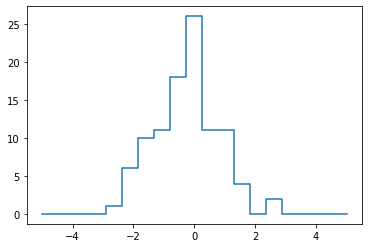

In [24]:
import matplotlib.pyplot as plt
plt.step(bins, counts)

>For histogram we usually will not use this method to calculate the histogram of a dataset, we have a library called matplotlib that provide us with a simple function that compute this:  
`plt.hist(x, bins, histtype='step')`

## Sorting NumPy Arrays

In computer science we know that we have different sorting algorithms, with Python we can implement all of them pretty easly, but we know that the time complexity is very important.  

The most simple sorting algorithm is `selection_sort` which it's time complexity is `O[N^2]`, that is not very desireable because if we double the array size the algorithm will run 4 times longer.  

Numpy on the other hand has a very efficient sorting algorithm which it's time complexity is `O[NlogN]` (quicksort, mergesort and heapsort)

In [27]:
x = np.array([4,6,3,1,8,9])
sorted_array = np.sort(x)
sorted_array

array([1, 3, 4, 6, 8, 9])

We can also use the in-place sorting option which will sort the values in our existing array:

In [28]:
x.sort()
x

array([1, 3, 4, 6, 8, 9])

Sometimes we will want to know the indices of the sorted array values:

In [29]:
x = np.array([4,6,3,1,8,9])
inds = np.argsort(x)
inds

array([3, 2, 0, 1, 4, 5])

We can always use the orginal variable to access the values of the sorted indices:

In [30]:
x[inds]

array([1, 3, 4, 6, 8, 9])

### Vertical and Horizontal Sorting
Numpy gives us the option to sort our values vertical (columns) and horizontal (rows)

In [32]:
x = x.reshape((2,3))
x

array([[4, 6, 3],
       [1, 8, 9]])

In [33]:
np.sort(x, axis=0)  # sort vertical, column-wise

array([[1, 6, 3],
       [4, 8, 9]])

In [34]:
np.sort(x, axis=1)  # sort horizontal, row-wise

array([[3, 4, 6],
       [1, 8, 9]])

### Partial Sort  
There are some use cases that we dont want to sort the entire array, a use case like is: find the `k` smallest values in the array.  

The `np.partition()` takes an array and a value, `k`. It return an array with the `k` smallest values in the beggining of the array and the rest of the values are unsorted and start from `k+1` index

In [35]:
x = np.array([4,6,3,1,8,9])
np.partition(x, 3)

array([1, 3, 4, 6, 8, 9])

Note that the k=3 smallest values are in the beggining and the rest are unsorted

`np.partition()` also can work along the axis and can be specified with the argument `axis`.  
This argument is very usefull.  
Lets say that we have a large 2D array, each row represents a country and each column represents a city. We want to check for every country which are the 2 cities with the least number of CoronaVirus infected people.

In [44]:
x = rng.randint(0,100, (10,10))  # 10 counties, each country has 10 cities

In [45]:
k = 2  # we want the 2 least cities of each country
x_sorted = np.partition(x, k, axis=1)
x_sorted

array([[ 8, 34, 60, 67, 72, 80, 97, 87, 95, 64],
       [ 7, 39, 44, 46, 86, 75, 53, 75, 45, 46],
       [14, 18, 19, 51, 92, 21, 20, 50, 37, 25],
       [ 3,  3, 21, 54, 70, 91, 27, 50, 28, 75],
       [ 0, 33, 44, 65, 87, 66, 90, 54, 85, 71],
       [ 5,  5, 11, 85, 24, 81, 16, 60, 86, 37],
       [ 7, 13, 26, 82, 64, 56, 92, 98, 39, 89],
       [12, 34, 45, 55, 48, 47, 60, 48, 83, 61],
       [ 7, 19, 38, 96, 89, 42, 84, 48, 63, 61],
       [ 8, 16, 20, 36, 48, 40, 53, 87, 87, 50]])

In [46]:
x_sorted[:, :k]

array([[ 8, 34],
       [ 7, 39],
       [14, 18],
       [ 3,  3],
       [ 0, 33],
       [ 5,  5],
       [ 7, 13],
       [12, 34],
       [ 7, 19],
       [ 8, 16]])

The option to get the arguments indices instead of values is also available with partition sorting, `np.argpartition()`

In [48]:
x_sorted = np.argpartition(x, k)  # horizontal partition sort
x_sorted

array([[2, 4, 1, 3, 0, 5, 6, 7, 8, 9],
       [0, 4, 1, 3, 2, 5, 6, 7, 8, 9],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [2, 7, 8, 3, 4, 5, 6, 1, 0, 9],
       [8, 5, 0, 3, 4, 1, 6, 7, 2, 9],
       [2, 9, 8, 3, 4, 5, 6, 7, 0, 1],
       [2, 9, 1, 3, 4, 5, 6, 7, 8, 0],
       [5, 0, 8, 3, 4, 1, 6, 7, 2, 9],
       [0, 2, 5, 3, 4, 1, 6, 7, 8, 9],
       [1, 6, 8, 3, 4, 5, 0, 7, 2, 9]])

And also along the vertical axis we can use the function:

In [50]:
x_sorted = np.argpartition(x, k, axis=1)  # vertical partition sort
x_sorted

array([[2, 4, 1, 3, 0, 5, 6, 7, 8, 9],
       [0, 4, 1, 3, 2, 5, 6, 7, 8, 9],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [2, 7, 8, 3, 4, 5, 6, 1, 0, 9],
       [8, 5, 0, 3, 4, 1, 6, 7, 2, 9],
       [2, 9, 8, 3, 4, 5, 6, 7, 0, 1],
       [2, 9, 1, 3, 4, 5, 6, 7, 8, 0],
       [5, 0, 8, 3, 4, 1, 6, 7, 2, 9],
       [0, 2, 5, 3, 4, 1, 6, 7, 8, 9],
       [1, 6, 8, 3, 4, 5, 0, 7, 2, 9]])

**Note: remember that those are the indices of the values**